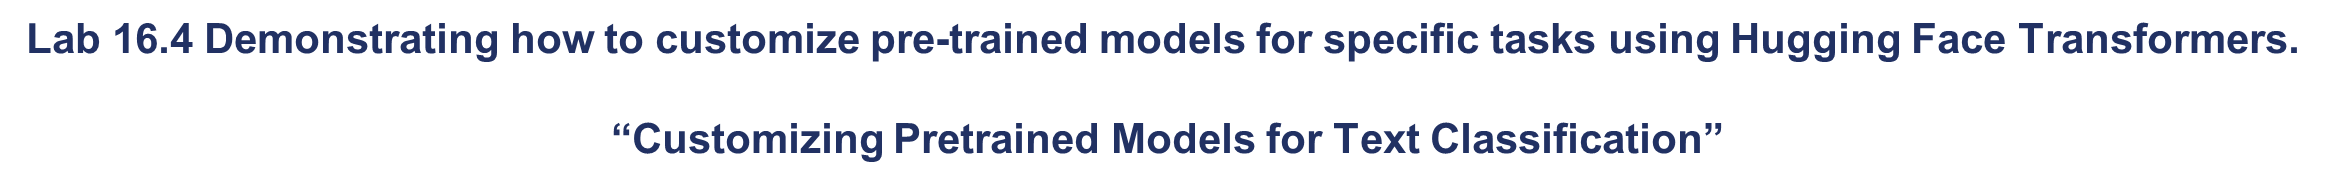

#### 1. Install Dependencies
Make sure you have the necessary libraries installed

In [1]:
pip install torch transformers


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

#### 2. Load Pretrained Model and Tokenizer
Import the required libraries and load the pretrained BERT model and tokenizer

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
import torch

# Load pretrained BERT model and tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')


#### 3. Prepare the Dataset
Prepare a dataset suitable for text classification. For this example, we'll create a small dataset:

In [ ]:
# Example dataset for sentiment analysis
train_texts = ["This movie is great!", "I disliked the food.", "The weather is lovely today."]
train_labels = [1, 0, 1]  # 1 for positive sentiment, 0 for negative sentiment


#### 4. Tokenization and Data Processing
Tokenize the dataset using the BERT tokenizer and convert it into a format suitable for training

In [ ]:
# Tokenize input texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True)

# Convert labels to PyTorch tensors
train_labels = torch.tensor(train_labels)


#### 5. Fine-Tuning Setup
Set up training arguments and initialize the Trainer object

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    per_device_train_batch_size=4,
    num_train_epochs=3,
    logging_dir='./logs',
    logging_steps=100,
    save_steps=500,
    overwrite_output_dir=True,
)

# Define Trainer object
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_encodings,
    eval_dataset=train_encodings,  # Using the same dataset for evaluation for simplicity
)


#### 6. Start Fine-Tuning
Begin fine-tuning the model on the task-specific dataset

In [ ]:
# Start fine-tuning
trainer.train()


#### 7. Evaluate and Save the Fine-Tuned Model
Evaluate the fine-tuned model on the training dataset and save it for future use

In [ ]:
# Evaluate the fine-tuned model
eval_results = trainer.evaluate()

# Save the fine-tuned model and tokenizer
model_path = "./fine_tuned_bert"
model.save_pretrained(model_path)
tokenizer.save_pretrained(model_path)


#### 8. Inference
Load the fine-tuned model and tokenizer for inference on new data

In [ ]:
# Example of loading the fine-tuned model for inference
from transformers import BertForSequenceClassification, BertTokenizer
import torch

# Load fine-tuned model and tokenizer
model_path = "./fine_tuned_bert"
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)

# Example inference
text = "I loved the movie!"
inputs = tokenizer(text, return_tensors='pt')
outputs = model(**inputs)
predicted_class = torch.argmax(outputs.logits, dim=1).item()

# Map predicted class to sentiment label
sentiment_label = "positive" if predicted_class == 1 else "negative"

print(f"Text: {text}")
print(f"Predicted Sentiment: {sentiment_label}")
